# Hyper tuned XGBoost Model for Credit Card Fraud Detection 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score,precision_score, recall_score, f1_score
import numpy as np
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [13]:
df=pd.read_csv("cleaned.csv")
# Drop 'Class' column and assign X values
X = df.drop(columns=['Class'])  
# Target variable is 'Class'
y = df['Class']  
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (984, 31)
Shape of y: (984,)


In [14]:
df.isnull().sum().sum()

0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Stanadrd Scaling

In [16]:
scaler = StandardScaler()
X_train_sscaled = scaler.fit_transform(X_train)
X_test_sscaled = scaler.fit_transform(X_test)


In [17]:
print(X_test_sscaled)

[[-1.00002872 -0.90379017 -1.57325888 ...  0.12134171 -0.44957308
  -0.46589921]
 [ 1.54299572  1.4787145   0.85134698 ... -0.19555242 -0.25625763
  -0.3670939 ]
 [-0.18399655 -0.27064116 -0.35675939 ...  1.09295822 -0.39999203
   0.47828432]
 ...
 [ 0.25497558  0.09323525  0.84912349 ... -0.14508625 -0.1497004
  -0.38705257]
 [-1.14543336 -1.01152772 -0.35587991 ...  0.32102885  1.00345512
  -0.40875022]
 [ 1.28302411  1.27977368  0.47678906 ...  0.19922245 -0.09924219
  -0.46289552]]


In [19]:
xgb_model = xgb.XGBClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_sscaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train XGBoost model with the best parameters
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train_sscaled, y_train)

# Predict on the testing set
y_pred_xgb = best_xgb_model.predict(X_test_sscaled)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics for XGBoost
print("Best Parameters:", best_params)
print("XGBoost Evaluation Metrics:")
print("Accuracy:", accuracy_xgb)
print("Mean Squared Error:", mse_xgb)
print("Mean Absolute Error:", mae_xgb)
print("Root Mean Squared Error:", rmse_xgb)
print("R-squared score:", r2_xgb)


Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
XGBoost Evaluation Metrics:
Accuracy: 0.9358108108108109
Mean Squared Error: 0.06418918918918919
Mean Absolute Error: 0.06418918918918919
Root Mean Squared Error: 0.25335585485476586
R-squared score: 0.7431963470319636


# Quantile Scaling

In [20]:
scaler_quantile = QuantileTransformer()
X_train_qscaled = scaler_quantile.fit_transform(X_train)
X_test_qscaled = scaler_quantile.fit_transform(X_test)
print(X_test_qscaled)

[[0.22033898 0.22033898 0.07457627 ... 0.66779661 0.13220339 0.        ]
 [0.95254237 0.95254237 1.         ... 0.26101695 0.20338983 0.54237288]
 [0.44745763 0.44745763 0.19661017 ... 0.90169492 0.14915254 0.84745763]
 ...
 [0.56610169 0.56610169 0.99661017 ... 0.37627119 0.31525424 0.51525424]
 [0.17966102 0.17966102 0.2        ... 0.74915254 0.91186441 0.46440678]
 [0.86101695 0.86101695 0.65423729 ... 0.70508475 0.34915254 0.0440678 ]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (688). n_quantiles is set to n_samples.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (296). n_quantiles is set to n_samples.
  warnings.warn(


In [21]:
xgb_model = xgb.XGBClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_qscaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train XGBoost model with the best parameters
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train_qscaled, y_train)

# Predict on the testing set
y_pred_xgb_qs = best_xgb_model.predict(X_test_qscaled)

# Calculate evaluation metrics
accuracy_xgb_qs = accuracy_score(y_test, y_pred_xgb)
mse_xgb_qs = mean_squared_error(y_test, y_pred_xgb)
mae_xgb_qs = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb_qs = np.sqrt(mse_xgb)
r2_xgb_qs = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics for XGBoost
print("Best Parameters:", best_params)
print("XGBoost Evaluation Metrics:")
print("Accuracy:", accuracy_xgb_qs)
print("Mean Squared Error:", mse_xgb_qs)
print("Mean Absolute Error:", mae_xgb_qs)
print("Root Mean Squared Error:", rmse_xgb_qs)
print("R-squared score:", r2_xgb_qs)
print(y_pred_xgb_qs)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
XGBoost Evaluation Metrics:
Accuracy: 0.9358108108108109
Mean Squared Error: 0.06418918918918919
Mean Absolute Error: 0.06418918918918919
Root Mean Squared Error: 0.25335585485476586
R-squared score: 0.7431963470319636
[1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0
 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1]


In [10]:
print('Performance of XGB with Standard Scaling',accuracy_xgb )
print('Performance of XGB with Quantile Scaling',accuracy_xgb_qs )

Performance of XGB with Standard Scaling 0.9358108108108109
Performance of XGB with Quantile Scaling 0.9358108108108109


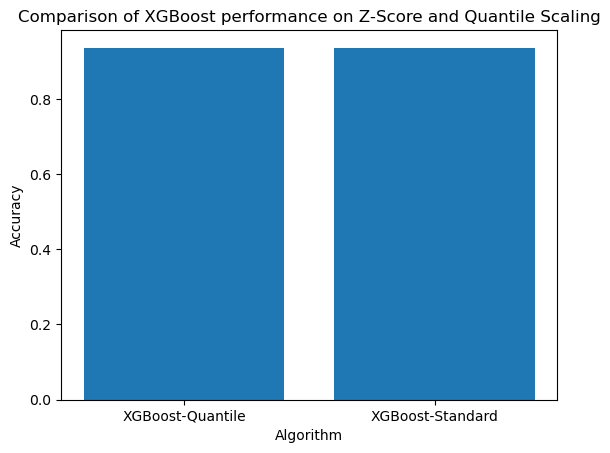

In [11]:
Algo = ['XGBoost-Quantile', 'XGBoost-Standard']
values = [accuracy_xgb_qs,accuracy_xgb]
plt.bar(Algo, values)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of XGBoost performance on Z-Score and Quantile Scaling')
plt.show()